## Load

In [24]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open(r"C:\Users\IBK\Documents\Seoul_Metro\data_total.pkl", 'rb') as file:
    data = pickle.load(file)
data.shape

(2559276, 24)

In [ ]:
spl = pd.DataFrame({'x':[1,2,1], 'y':[2,3,4]})

 ## Station Number (역번호) and Station Name (역명)

In [21]:
stn_number_counts = data['역번호'].value_counts()
stn_name_counts = data['역명'].value_counts()

### Freqeuncy

<AxesSubplot:title={'center':'stn_name_counts'}, ylabel='Frequency'>

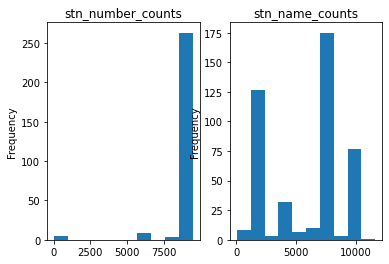

In [26]:
plt.subplot(1,2,1)
plt.title('stn_number_counts')
stn_number_counts.plot(kind='hist')

plt.subplot(1,2,2)
plt.title('stn_name_counts')
stn_name_counts.plot(kind='hist')

In [13]:
# low frequency
print('Max stn_number_count:', stn_number_counts.max())
print('='*30)

stn_names = []
for i in stn_number_counts[stn_number_counts < stn_no.max()].index:
    # print
    print('Stn_number_count: ', stn_number_counts[i])
    print('Stn_number:', i)
    stn_name = data[data['역번호'] == i]['역명'].unique()
    print(stn_name, '\n')

    # save
    stn_names.append(stn_name)


Max stn_number_count: 9436
Stn_number_count:  9094
Stn_number: 2515
['마곡'] 

Stn_number_count:  7944
Stn_number: 340
['가락시장(340)' '가락시장'] 

Stn_number_count:  7942
Stn_number: 342
['오금(342)' '오금'] 

Stn_number_count:  7938
Stn_number: 341
['경찰병원(341)' '경찰병원'] 

Stn_number_count:  5916
Stn_number: 2761
['부평구청(7)' '부평구청'] 

Stn_number_count:  5916
Stn_number: 2758
['상동'] 

Stn_number_count:  5916
Stn_number: 2756
['신중동'] 

Stn_number_count:  5914
Stn_number: 2757
['부천시청'] 

Stn_number_count:  5914
Stn_number: 2760
['굴포천'] 

Stn_number_count:  5914
Stn_number: 2759
['삼산체육관'] 

Stn_number_count:  5914
Stn_number: 2754
['부천종합운동장'] 

Stn_number_count:  5914
Stn_number: 2755
['춘의'] 

Stn_number_count:  5914
Stn_number: 2753
['까치울'] 

Stn_number_count:  248
Stn_number: 2564
['하남풍산'] 

Stn_number_count:  240
Stn_number: 2563
['미사'] 

Stn_number_count:  230
Stn_number: 321
['충무로'] 

Stn_number_count:  130
Stn_number: 2615
['연신내'] 

Stn_number_count:  46
Stn_number: 2649
['신내'] 



In [14]:
# check if stn_no hasn't changed
for stn_name in stn_names:
    if len(stn_name) == 1:
        print(stn_name[0])
        print(data[data['역명'].str.contains(stn_name[0],regex=False)]['역번호'].unique()) # print stn_number that corresponds to '마곡'
    else:
        print(stn_name[1])
        print(data[data['역명'].str.contains(stn_name[1],regex=False)]['역번호'].unique())


마곡
[2515]
가락시장
[2818  340]
오금
[2558  342]
경찰병원
[341]
부평구청
[2761]
상동
[2758]
신중동
[2756]
부천시청
[2757]
굴포천
[2760]
삼산체육관
[2759]
부천종합운동장
[2754]
춘의
[2755]
까치울
[2753]
하남풍산
[2564]
미사
[2563]
충무로
[423 321]
연신내
[ 311 2615]
신내
[ 311 2615 2649]


### Bijection (일대일대응)

In [20]:
# bijection check 1
# stn_name -> stn_number

print('역명 : [역명에 대응되는 역번호들]')
print('='*50)

for stn_name in data['역명'].unique():
    stn_numbers = data[data['역명'] == stn_name]['역번호'].unique()
    if stn_numbers.shape[0] > 1:
        print(stn_name, ':', stn_numbers)

역명 : [역명에 대응되는 역번호들]
오금 : [2558  342]
서울역 : [150 426]
시청 : [151 201]
종로3가 : [ 153  319 2535]
동대문 : [155 421]
신설동 : [156 246]
동묘앞 : [ 159 2637]
을지로3가 : [203 320]
을지로4가 : [ 204 2536]
동대문역사문화공원 : [ 205  422 2537]
신당 : [ 206 2636]
왕십리(성동구청) : [ 208 2541]
건대입구 : [ 212 2729]
잠실(송파구청) : [ 216 2815]
교대(법원.검찰청) : [223 330]
사당 : [226 433]
대림(구로구청) : [ 233 2746]
영등포구청 : [ 236 2524]
합정 : [ 238 2623]
충정로(경기대입구) : [ 243 2532]
연신내 : [ 311 2615]
불광 : [ 312 2613]
약수 : [ 323 2634]
고속터미널 : [ 329 2736]
가락시장 : [ 340 2818]
노원 : [ 411 2715]
충무로 : [423 321]
삼각지 : [ 428 2629]
공덕 : [2530 2627]
청구 : [2538 2635]
군자(능동) : [2545 2727]
천호(풍납토성) : [2548 2812]
태릉입구 : [2646 2719]
동대문역사문화공원(DDP) : [ 205  422 2537]
동대문역사문화공원(DDP)(DDP) : [ 205  422 2537]


In [19]:
# bijection check 2
# stn_number -> stn_name

print('역번호 : [역번호에 대응되는 역명들]')
print('='*50)

for stn_number in data['역번호'].unique():
    stn_names = data[data['역번호'] == stn_number]['역명'].unique()
    if stn_names.shape[0] > 2:
        print(stn_number, ':', stn_names)


# 성내역은 잠실나루역의 옛이름
# 신천역은 잠실새내역의 옛이름
# 따라서 문제없음


역번호 : [역번호에 대응되는 역명들]
205 : ['동대문운동장(205)' '동대문역사문화공원(205)' '동대문역사문화공원' '동대문역사문화공원(DDP)'
 '동대문역사문화공원(DDP)(DDP)']
208 : ['왕십리(208)' '왕십리(성동구청)(208)' '왕십리(성동구청)']
215 : ['성내(215)' '잠실나루(215)' '잠실나루']
217 : ['신천(217)' '잠실새내(217)' '잠실새내']
227 : ['낙성대(227)' '낙성대' '낙성대(강감찬)']
414 : ['수유(414)' '수유(강북구청)(414)' '수유(강북구청)']
416 : ['미아삼거리(416)' '미아사거리(416)' '미아사거리']
422 : ['동대문운동장(422)' '동대문역사문화공원(422)' '동대문역사문화공원' '동대문역사문화공원(DDP)'
 '동대문역사문화공원(DDP)(DDP)']
2537 : ['동대문역사문화공원5' '동대문역사문화공원' '동대문역사문화공원(DDP)' '동대문역사문화공원(DDP)(DDP)']


## Date

In [27]:
date_counts = data['날짜'].value_counts()

<AxesSubplot:ylabel='Frequency'>

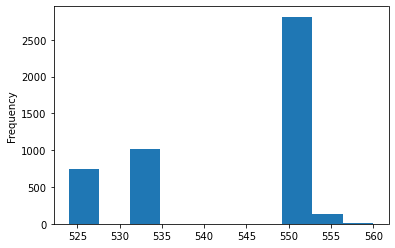

In [28]:
date_counts.plot(kind='hist')